The first step in using Spark is connecting to a cluster.

In practice, the cluster will be hosted on a remote machine that's connected to all other nodes. There will be one computer, called the master that manages splitting up the data and the computations. The master is connected to the rest of the computers in the cluster, which are called worker. The master sends the workers data and calculations to run, and they send their results back to the master.

When you're just getting started with Spark it's simpler to just run a cluster locally. Thus, for this course, instead of connecting to another computer, all computations will be run on DataCamp's servers in a simulated cluster.

Creating the connection is as simple as creating an instance of the SparkContext class. The class constructor takes a few optional arguments that allow you to specify the attributes of the cluster you're connecting to.

An object holding all these attributes can be created with the SparkConf() constructor. Take a look at the documentation for all the details!

For the rest of this course you'll have a SparkContext called sc already available in your workspace

* Spark Documentation: https://spark.apache.org/docs/latest/

In [ ]:
from pyspark import SparkContext
sc = SparkContext("local", "Simple App") 

# Verify SparkContext
print(sc)

# Print Spark version
print(sc.version)

# Using DataFrames

Spark's core data structure is the Resilient Distributed Dataset (RDD). This is a low level object that lets Spark work its magic by splitting data across multiple nodes in the cluster. However, RDDs are hard to work with directly, so in this course you'll be using the Spark DataFrame abstraction built on top of RDDs.

The Spark DataFrame was designed to behave a lot like a SQL table (a table with variables in the columns and observations in the rows). Not only are they easier to understand, DataFrames are also more optimized for complicated operations than RDDs.

When you start modifying and combining columns and rows of data, there are many ways to arrive at the same result, but some often take much longer than others. When using RDDs, it's up to the data scientist to figure out the right way to optimize the query, but the DataFrame implementation has much of this optimization built in!

To start working with Spark DataFrames, you first have to create a SparkSession object from your SparkContext. You can think of the SparkContext as your connection to the cluster and the SparkSession as your interface with that connection.

Remember, for the rest of this course you'll have a SparkSession called spark available in your workspace!

Creating multiple SparkSessions and SparkContexts can cause issues, so it's best practice to use the SparkSession.builder.getOrCreate() method. This returns an existing SparkSession if there's already one in the environment, or creates a new one if necessary!

In [ ]:
# Import SparkSession from pyspark.sql
from pyspark.sql import SparkSession

# Create my_spark
my_spark = SparkSession.builder.getOrCreate()

# Print my_spark
print(myspark)

# Viewing tables

Once you've created a SparkSession, you can start poking around to see what data is in your cluster!

Your SparkSession has an attribute called catalog which lists all the data inside the cluster. This attribute has a few methods for extracting different pieces of information.

One of the most useful is the .listTables() method, which returns the names of all the tables in your cluster as a list.

In [ ]:
# Print the tables in the catalog
print(spark.catalog.listTables())

One of the advantages of the DataFrame interface is that you can run SQL queries on the tables in your Spark cluster. 

As you saw in the last exercise, one of the tables in your cluster is the flights table. This table contains a row for every flight that left Portland International Airport (PDX) or Seattle-Tacoma International Airport (SEA) in 2014 and 2015.

Running a query on this table is as easy as using the .sql() method on your SparkSession. This method takes a string containing the query and returns a DataFrame with the results!

If you look closely, you'll notice that the table 'flights' is only mentioned in the query, not as an argument to any of the methods. This is because there isn't a local object in your environment that holds that data, so it wouldn't make sense to pass the table as an argument.

Remember, we've already created a SparkSession called spark in your workspace. (It's no longer called my_spark because we created it for you!)

In [ ]:
#there is a spark session under which there is a dataframe wih the name 'flights'

# Don't change this query
query = "FROM flights SELECT * LIMIT 10"

# Get the first 10 rows of flights
flights10 = spark.sql(query)  #'flights' is only mentioned in the query, not as an argument to any of the methods. This is because there isn't a local object in your environment that holds that data, so it wouldn't make sense to pass the table as an argument.
 
# Show the results
flights10.show()

Suppose you've run a query on your huge dataset and aggregated it down to something a little more manageable.

Sometimes it makes sense to then take that table and work with it locally using a tool like pandas. Spark DataFrames make that easy with the .toPandas() method. Calling this method on a Spark DataFrame returns the corresponding pandas DataFrame. It's as simple as that!

This time the query counts the number of flights to each airport from SEA and PDX

In [ ]:
# Don't change this query
query = "SELECT origin, dest, COUNT(*) as N FROM flights GROUP BY origin, dest"

# Run the query
flight_counts = spark.sql(query)

# Convert the results to a pandas DataFrame
pd_counts = flight_counts.toPandas()

# Print the head of pd_counts
print(pd_counts.head())

Putting pandas df into spark

The .createDataFrame() method takes a pandas DataFrame and returns a Spark DataFrame.

The output of this method is stored locally, not in the SparkSession catalog. This means that you can use all the Spark DataFrame methods on it, but you can't access the data in other contexts.

For example, a SQL query (using the .sql() method) that references your DataFrame will throw an error. To access the data in this way, you have to save it as a temporary table.

You can do this using the .createTempView() Spark DataFrame method, which takes as its only argument the name of the temporary table you'd like to register. This method registers the DataFrame as a table in the catalog, but as this table is temporary, it can only be accessed from the specific SparkSession used to create the Spark DataFrame.

There is also the method .createOrReplaceTempView(). This safely creates a new temporary table if nothing was there before, or updates an existing table if one was already defined. You'll use this method to avoid running into problems with duplicate tables.

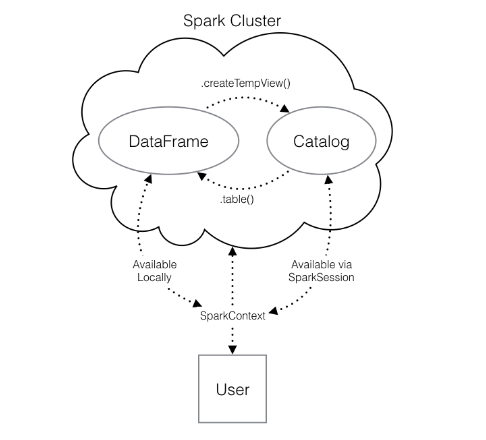

In [ ]:
# Create pd_temp
pd_temp = pd.DataFrame(np.random.random(10))

# Create spark_temp from pd_temp
spark_temp = spark.createDataFrame(pd_temp)

# Examine the tables in the catalog
print(spark.catalog.listTables())

# Add spark_temp to the catalog
spark_temp.createOrReplaceTempView("temp")

# Examine the tables in the catalog again
print(spark.catalog.listTables())

Luckily, your SparkSession has a .read attribute which has several methods for reading different data sources into Spark DataFrames. Using these you can create a DataFrame from a .csv file just like with regular pandas DataFrames!

The variable file_path is a string with the path to the file airports.csv. This file contains information about different airports all over the world.

In [ ]:
# Don't change this file path
file_path = "/usr/local/share/datasets/airports.csv"

# Read in the airports data
airports = spark.read.csv(file_path, header=True)

# Show the data
airports.show()